## DOG VISION

In [1]:
#Data : from kaggle

#Evaluation : The evaluation is a file with prediction probabilities for each dog breed of each test image.

# Features : Some information about the data
#Dealing with images (Unstructured data)
#There are 120 breeds of dogs this means 120 different classes.
#There are around 10000+ images in the training set(with labels)
#There are around 10000+ images in the test set(with no labels for prediction

In [2]:
## how to unzip the folder on colab 'file source path' -d 'destination file path'

In [3]:
#This notebook builds an end-to-end multi-class image classifier using Tensorflow2.0

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.6.0'

In [6]:
import tensorflow_hub as hub

In [7]:
#Our data has to be in numeric format so Turning our images into Tensors.

#Accessing our data and checking out labels

In [8]:
import pandas as pd
label_csv = pd.read_csv('labels.csv')

In [9]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [11]:
import matplotlib.pyplot as plt
import seaborn as ssn
ssn.set()

<AxesSubplot:>

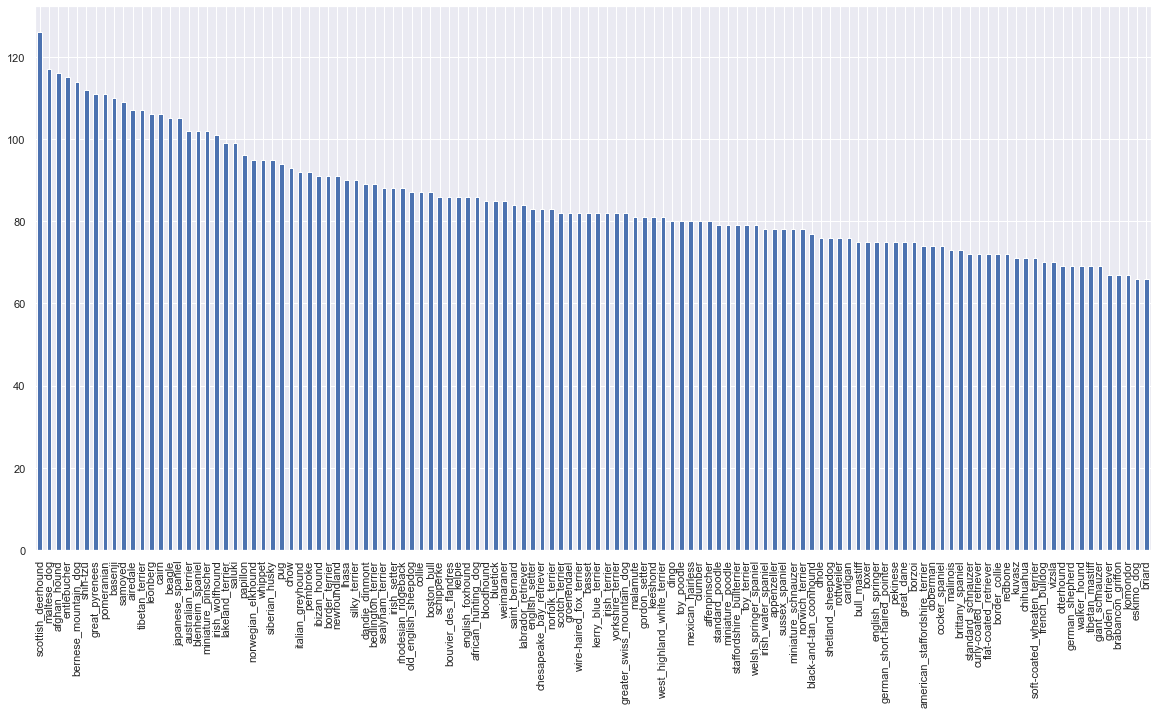

In [12]:
label_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [13]:
label_csv['breed'].value_counts().median()

82.0

In [14]:
from IPython.display import Image

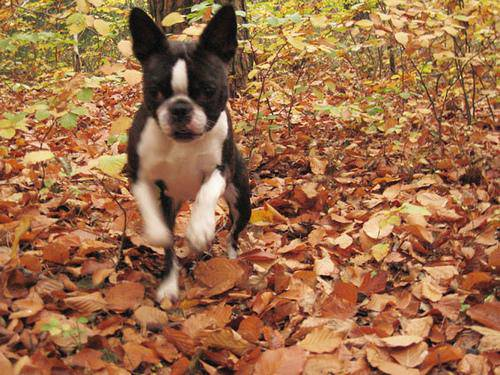

In [15]:
Image('train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [16]:
#Getting images and their labels
#Getting alist of all of our images

In [17]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [18]:
#create pathnames from image ids

In [19]:
filenames = ['train/' + fname + '.jpg' for fname in label_csv['id']]
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [20]:
#check weather number of filenames matches number of actual image files
import os
if len(os.listdir('train')) == len(filenames):
    print('Actual match')
else:
    print('Not match')

Actual match


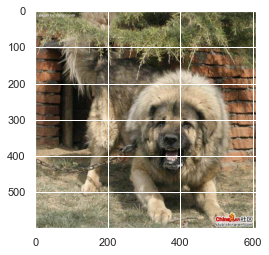

In [21]:
image=plt.imread(filenames[9000])
plt.imshow(image)

In [22]:
label_csv['breed'][9000]

'tibetan_mastiff'

In [23]:
#WE have now got our training image filepaths in list let's prepare our labels

In [24]:
import numpy as np
labels = label_csv['breed'].to_numpy()
#labels=np.array(labels) # same asa above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [25]:
len(labels)

10222

In [26]:
#See if numbers of labels matches with the number of filenames
if len(filenames)==len(labels):
    print('match')
else:
    print('not match')

match


In [27]:
#find unique label values 
unique_breed = np.unique(labels)
unique_breed
len(unique_breed)

120

In [28]:
#Turn a single label into an array of booleans
labels[0] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [29]:
#Turn a every label into an array of booleans
boolean_array = [label==unique_breed for label in labels]
boolean_array[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [30]:
len(boolean_array)

10222

In [31]:
#Example : Turning boolean array into integers
print(labels[0]) #Original label
print(np.where(unique_breed == labels[0])) #index where label occurs
print(boolean_array[0].argmax()) #index where label occur in boolean array
print(boolean_array[0].astype(int))  #there will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [32]:
print(labels[2])
print(boolean_array[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [33]:
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Creating validation set

In [34]:
# Since the dataset from kaggle dosen't come wih a validation set we're going to create our own
#Set up X & y variables
X = filenames
y = boolean_array

In [35]:
len(filenames)

10222

## we are going to start of experimenting with 1000 images and increase as needed

In [36]:
#to use for experimenting
# using param we can adjust the imges as per our nedd
NUM_IMAGES = 1000 #@param {type :"slider", min=1000, max=1000, step=1000} 

In [37]:
#Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

#split them into training and validation of total size  NUM_IMGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Preprocessing images (turnning images into Tensors)

In [38]:
#Befor we do , let's see what importing an image looks like
#converting image to Numpy array
image =plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [39]:
image.max(),image.min()

(255, 0)

In [40]:
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [41]:
#Create a constnt tensor from a tensor like object
tf.constant(image)[:2] # it will help us to run on GPU on high speed

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [42]:
# To preprocessing our images into Tensors we are going to write a function which does a few things

#1.Take an image filepaths as input
#2. Use Tensorflow to read the file and save it to variable , `image`
#3.Turn our 'image' into Tensors
#4. Resize the `image` to be a shape of(224, 224)
#5. Return the modified `image`

In [131]:
#Define image size
IMG_SIZE = 224

#Create function for preprocessing images
def process_images(image_path,img_size=IMG_SIZE):
    """Takes an image file path and turn the images into Tensor"""
    #Read in an image file
    image = tf.io.read_file(image_path)
    #Turn the jpeg image into numeric Tensor with 3 colors channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    #convert the color channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    #Resize the image to our desire value (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
    
    return image

### Turning our data into batches

* Why turn our data into batches?
* Let's say you're trying to process 10,000+ images in one go..... they all might not fit into memory
* So that's why we do about 32 (this is batch size)images at a time (you can manually adjust the batch size if need be)
* In order to use Tensorflow effectively, we need our data in the from of Tensor tuple which looks like this:`(image,label)`

In [132]:
#Create a simple function to return a tuple(image, label)
def get_image_label(image_path, label):
    """
    Taken an image file path name and associated label,
    preprocesses the image and return a tuple of (image, label)
    """
    image = process_images(image_path)
    return image, label

In [133]:
#Demo of the above
#pross_images(X[42],y[42])
(process_images(X[42]),tf.constant(y[42])) #for getting both x and y in output

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [46]:
# Now we have got the way to turn our data into tuples of Tensorflow in the form of `(image,label)
# Let's make a function to turn all of our data(x & y) into batches

In [136]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    Create batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it is training data but doesn't shuffle if it's validation data.
    Also accept test data as input (no labels).
    """
    # if the data is a test dataset ,we probably don't have labels
    if test_data:
        print("Creating text data batches.......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepath no labels
        data_batch = data.map(process_images).batch(BATCH_SIZE)
        return data_batch
    
    # if the data is a valid dataset ,we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches.......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepath
                                                  tf.constant(y)))  # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
        # if the data is a valid dataset ,we don't need to shuffle it
    else:
        print("Creating training data batches.......")
        # Turn filepaths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepath
                                                  tf.constant(y)))  # labels
        
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images 
        data = data.shuffle(buffer_size=len(X))
        
        #Create (image, label) tuples (this is also turns the images into a preprocessed image)
        data = data.map(get_image_label)
        
        # Turns the training data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [48]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches.......
Creating validation data batches.......


In [49]:
# Check out the different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches

* Our data now in batches, however,these can be little hard to understand/comprehend, let's visualize data 

In [50]:
# Create a function for viewing the images in data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a batch data
    """
    # Setup the figure
    plt.figure(figsize=(10,10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns,(with lndex))
        ax = plt.subplot(5,5,i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breed[labels[i].argmax()])
        # Turn the grid lines off
        # plt.axis('off')

In [51]:
unique_breed[y[0].argmax()]

'boston_bull'

In [52]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [53]:
# Using next it iterate the next items
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.1179686 , 0.16502742, 0.07875291],
          [0.11090687, 0.14227942, 0.05992648],
          [0.13861616, 0.15038086, 0.08371419],
          ...,
          [0.09822311, 0.10214468, 0.08253683],
          [0.09411766, 0.09803922, 0.07450981],
          [0.09411766, 0.09803922, 0.07450981]],
 
         [[0.09004024, 0.13301994, 0.03890228],
          [0.13321337, 0.16234604, 0.08073973],
          [0.1614324 , 0.17206806, 0.10596591],
          ...,
          [0.08828788, 0.09220946, 0.07260161],
          [0.09019608, 0.09411766, 0.07058824],
          [0.09019608, 0.09411766, 0.07058824]],
 
         [[0.21089962, 0.24227217, 0.15207608],
          [0.22086869, 0.24242409, 0.16513051],
          [0.15428524, 0.16085301, 0.10198173],
          ...,
          [0.08452388, 0.08844545, 0.06491604],
          [0.08627451, 0.09019608, 0.06666667],
          [0.08627451, 0.09019608, 0.06666667]],
 
         ...,
 
         [[0.3784181 , 0.4127799 , 0.25518328],
          [0.31248

In [54]:
len(train_images), len(train_labels)

(32, 32)

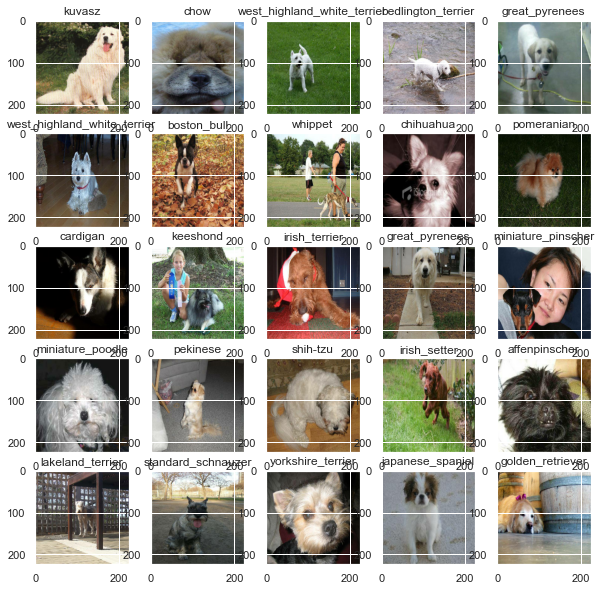

In [55]:
# Visualize the data training batch
#train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

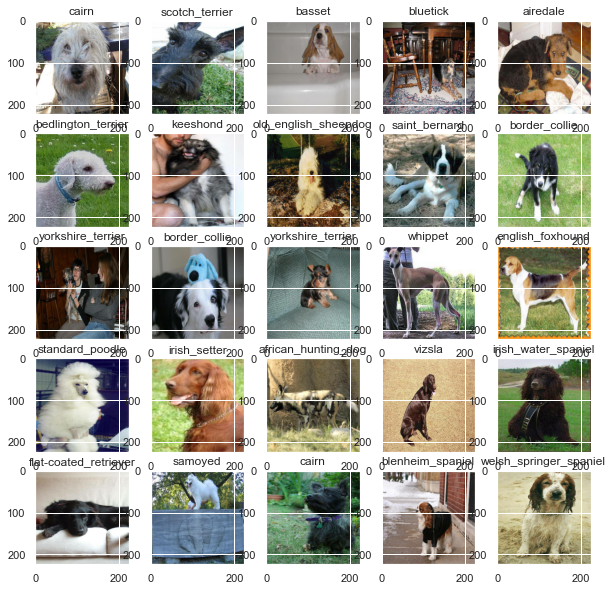

In [56]:
# Let's visualize the validation data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building  a model

* Before buil a model, there are a few things we need to define:
    * The input shape(our images shape, in the from of Tensors) to our model.
    * The output shape(images shape, in the from of Tensors) to our model.
    * The URL of the model we want to use.

In [57]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape to the model
OUTPUT_SHAPE = len(unique_breed)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

## Now we have got inputs, output and model ready to go on. Let's put them together into keras deep learning model.

* @knowing this, let's create function which :

* Take the input shape, output shape and model we have chosen the parameters.
* Define layers in keras model in sequential fashion (do this first then this then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it will be getting)
* Return the model.

In [58]:
# Create function which builds keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print('Building model with : ',MODEL_URL)
    
    #setup m odel layers
    model =tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 input layer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation='softmax') # Layer 2 output layer
    ])
    
    # Compile the model
    model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'])
    
    # Build the model    
    model.build(INPUT_SHAPE)
    
    return model

In [59]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
callbacks are helper functions a model can use during training to do such things as save its progress, checks ts progress or stop training early if a model stop improving

we will create two callbacks, one for TensorBoard which helps track our model progress and another for early stopping which prevents our model from training for too long.

### TensorBoard callback

To stup a TensorBord callback, we need to do 3 thinngs:
1. Load the TensorBoard notebook extension.
2. Create TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize our model training logs with the %tensorboard magic function (we'll do this after model training).

In [60]:
#load TensorBoard notebook extension
%load_ext tensorboard

In [61]:
import datetime

#Create a function to build a TensorBoard callback

def create_tensorboard_callback():
    logdir = os.path.join('C:/Users/home/Documents/Workig/New_Workig/Deep learning/logs',
                         # Make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback

Early stopping helps stop model from overfitting by stopping trainning if a certain evaluation metric stop improving

In [62]:
# Creating early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [63]:
#Trsining a Model(on subset of data)
# Our first model is only going to train on 1000 i mages, to make sur everything is working

In [64]:
NUM_EPOCHS = 100 #params {Type : "slider", min=10,max=100,steps=10}

In [65]:
# if you want to check the GPU is available or not
print("GPU", "available (Yess)" if tf.config.list_physical_devices("GPU") else "not available : (")

GPU not available : (


In [66]:
# Lets create function which train a model 
# Create a model using create_model()
#setup tensorBoard callback using create_tensorboard_callback()
#call the fit() function on our model passing it the training data, validation data,number of epochs to train for(NUM_EPOCHS)
 # and the callback we would like to use
#Reurn the model

In [67]:
# Build a function to train and return a trainrd model 
def train_model():
    """
    Trains a given model and returns the trained version.
    """
    # Create a model 
    model = create_model()
    
    #create new TensorBoard session everytime we train a model 
    tensorboard = create_tensorboard_callback()
    
    #Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard, early_stopping])
    #return the model
    return model

In [68]:
# fit the model to the data
model=train_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 78s 3s/step - loss: 4.5685 - accuracy: 0.0988 - val_loss: 3.6387 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 60s 2s/step - loss: 1.6271 - accuracy: 0.7038 - val_loss: 2.2879 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 60s 2s/step - loss: 0.5640 - accuracy: 0.9425 - val_loss: 1.7582 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 60s 2s/step - loss: 0.2558 - accuracy: 0.9837 - val_loss: 1.5494 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 60s 2s/step - loss: 0.1484 - accuracy: 0.9950 - val_loss: 1.4681 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 67s 3s/step - loss: 0.0999 - accuracy: 1.0000 - val_loss: 1.4123 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============================] - 62s 2s

In [69]:
# What re the ways to deal with the overfitting in deep learning

In [70]:
#Checking the tensorboard log

#The tensorboard magic fuction (%tensorboard) will access the log directory that we created earlier and visualize its contents

In [71]:
 %tensorboard --logdir C:/Users/home/Documents/Workig/New_Workig/Deep\ learning/logs

Reusing TensorBoard on port 6006 (pid 7836), started 2 days, 17:59:13 ago. (Use '!kill 7836' to kill it.)

In [72]:
# Making and evaluating Predictions using a trained model

In [73]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [74]:
#Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data,verbose=1) #verbose use for showing the progrss of the activity
predictions

7/7 [==============================] - 13s 2s/step


array([[6.0409741e-03, 6.9580499e-05, 1.5973097e-03, ..., 7.1859785e-04,
        2.1021104e-04, 9.1230869e-03],
       [2.8014826e-03, 2.0125953e-03, 8.3803855e-02, ..., 1.5827856e-03,
        3.6301676e-03, 4.0747630e-04],
       [7.9682904e-06, 2.9615676e-05, 1.2518380e-05, ..., 4.6783633e-05,
        1.8094293e-05, 3.4429241e-04],
       ...,
       [2.7151156e-05, 1.6544473e-04, 4.3811157e-05, ..., 6.8528221e-05,
        5.5859645e-04, 3.2665201e-05],
       [5.5377292e-03, 4.4716799e-04, 1.3412730e-04, ..., 3.0536304e-04,
        3.3481243e-05, 1.6568642e-02],
       [2.2618551e-04, 1.2065730e-05, 1.2141636e-03, ..., 1.0706595e-03,
        9.7929966e-04, 3.1571023e-04]], dtype=float32)

In [75]:
predictions.shape

(200, 120)

In [76]:
np.sum(predictions[0])

1.0

In [77]:
np.sum(predictions[1])

1.0000001

In [78]:
len(unique_breed)

120

In [79]:
# First prediction
index = 0
print(predictions[index])
print(f"Max value (Robability of prediction): {np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"max index: {np.argmax(predictions[index])}")
print(f"predicted label: {unique_breed[np.argmax(predictions[index])]}")

[6.0409741e-03 6.9580499e-05 1.5973097e-03 1.7560490e-04 3.8872991e-04
 5.9658931e-05 1.6712967e-02 5.3005357e-04 3.0795467e-04 9.5390360e-04
 1.7004659e-03 3.0298173e-04 3.6454658e-04 2.0379687e-04 6.5953244e-04
 5.3088152e-04 1.2807698e-04 8.5966893e-02 2.5266338e-05 3.1548168e-04
 2.5728934e-03 3.2570498e-04 4.0263443e-05 2.2715842e-03 4.8455720e-05
 9.3086674e-05 1.9887270e-01 2.9500027e-04 6.6951493e-04 1.0321572e-03
 3.2823102e-04 1.2989307e-02 3.0700974e-03 1.6647531e-04 4.3912928e-04
 9.1434410e-03 1.9378656e-05 5.4639945e-04 8.2855207e-05 1.0678055e-03
 1.9777769e-03 2.8707065e-05 8.0633283e-05 1.0980793e-03 4.8701349e-05
 2.4449642e-04 5.8230544e-05 1.9639199e-04 7.5210433e-04 5.4306997e-04
 3.0392950e-04 5.2245432e-05 4.7967804e-04 1.0378039e-04 7.7591467e-05
 5.0400828e-05 3.0278374e-04 2.5014535e-03 5.7534850e-04 1.3685864e-01
 1.5746917e-03 2.9702051e-04 1.1715342e-03 3.9145007e-04 5.7827367e-04
 8.7891199e-02 3.4242796e-04 1.7922113e-03 5.5675050e-03 1.7452422e-03
 1.022

In [80]:
unique_breed[82]

'old_english_sheepdog'

In [81]:
# Having the above functionality is great but we want to able to do it t scale.
# And it would be even better if we could see the image the prediction is being made on.
# Note : Prediction probabilities are also known as confidence levels.

In [82]:
# Turn prediction probabilities into their respective label (easier to uderstand)
def get_pred_label(prediction_probabilities):
    """
    Turn an array of prediction probabilities into a label.
    """
    return unique_breed[np.argmax(prediction_probabilities)]

#get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[9])
pred_label

'collie'

In [83]:
# Now since our validation data is still in a batch dataset, we will have to unbatchify it to make predictions 
# on the validation images and then compare those predictions to the validation labels (truth labels)

In [84]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [85]:
# Create function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
    """
    images = []
    labels = []
    #loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breed[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [86]:
get_pred_label(val_labels[0])

'affenpinscher'

In [87]:
#images_ = []
#labels_ = []

#loop through unbatch data
#for images, labels in val_data.unbatch().as_numpy_iterator():
    #print(images)
    #print(labels)
    #images_.append(image)
    #labels_.append(label)
#images_[0],labels_[0]

In [88]:
#get_pred_label(labels_[0])

In [89]:
#get_pred_label(predictions[0])

In [90]:
# Now we have got ways to get :
 # Prediction labels
 # Validation labels
 # Validation images

# Lets make some function to make these all a bit more visualization

# We will create a function which :
 # Take an array of prediction probabilities, an array of truth labels and an array of images and an integer.
 # Convert the prediction probabilities of a predicted lable.
 # Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [91]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for sample n
    """
    
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
    
    # Plot image & Remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change plot title to be predicted, probability of prediction and truth label
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    # Change plot title to be predicted, probabilities of prediction and true label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                    color=color)

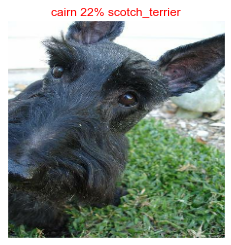

In [92]:
plot_pred(prediction_probabilities=predictions,
         labels=val_labels,
         images=val_images)

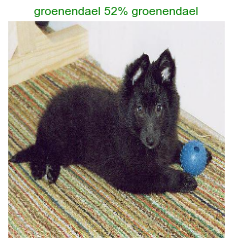

In [93]:
plot_pred(prediction_probabilities=predictions,
         labels=val_labels,
         images=val_images,
         n=77)

In [94]:
# Now we have got one function to visualize our models top predictions, lets kake another to view our models top 10 predictions.

#This function will:
 # Take an input of prediction probabilities array and ground thruth array and integer.
 # Find the prediction using get_pred_label()
 # Find the top 10 :
    #Prediction probanilities indexes
    # Prediction probabilities values
    # Prediction labels
 # Plot the top 10 prediction probability values and labels, coloring the truth label green

In [95]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plus the top 10 heighest prediction configuration along with the truth label for sample n.
    """
    pred_prob,true_label = prediction_probabilities[n],labels[n]
    
    # Get the prediction label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breed[top_10_pred_indexes]
    
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
    
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
    
    # Chnge color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

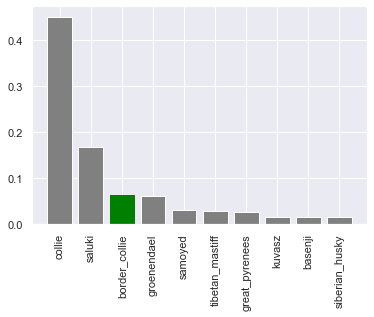

In [96]:
plot_pred_conf(prediction_probabilities=predictions,
              labels=val_labels,
              n=9)

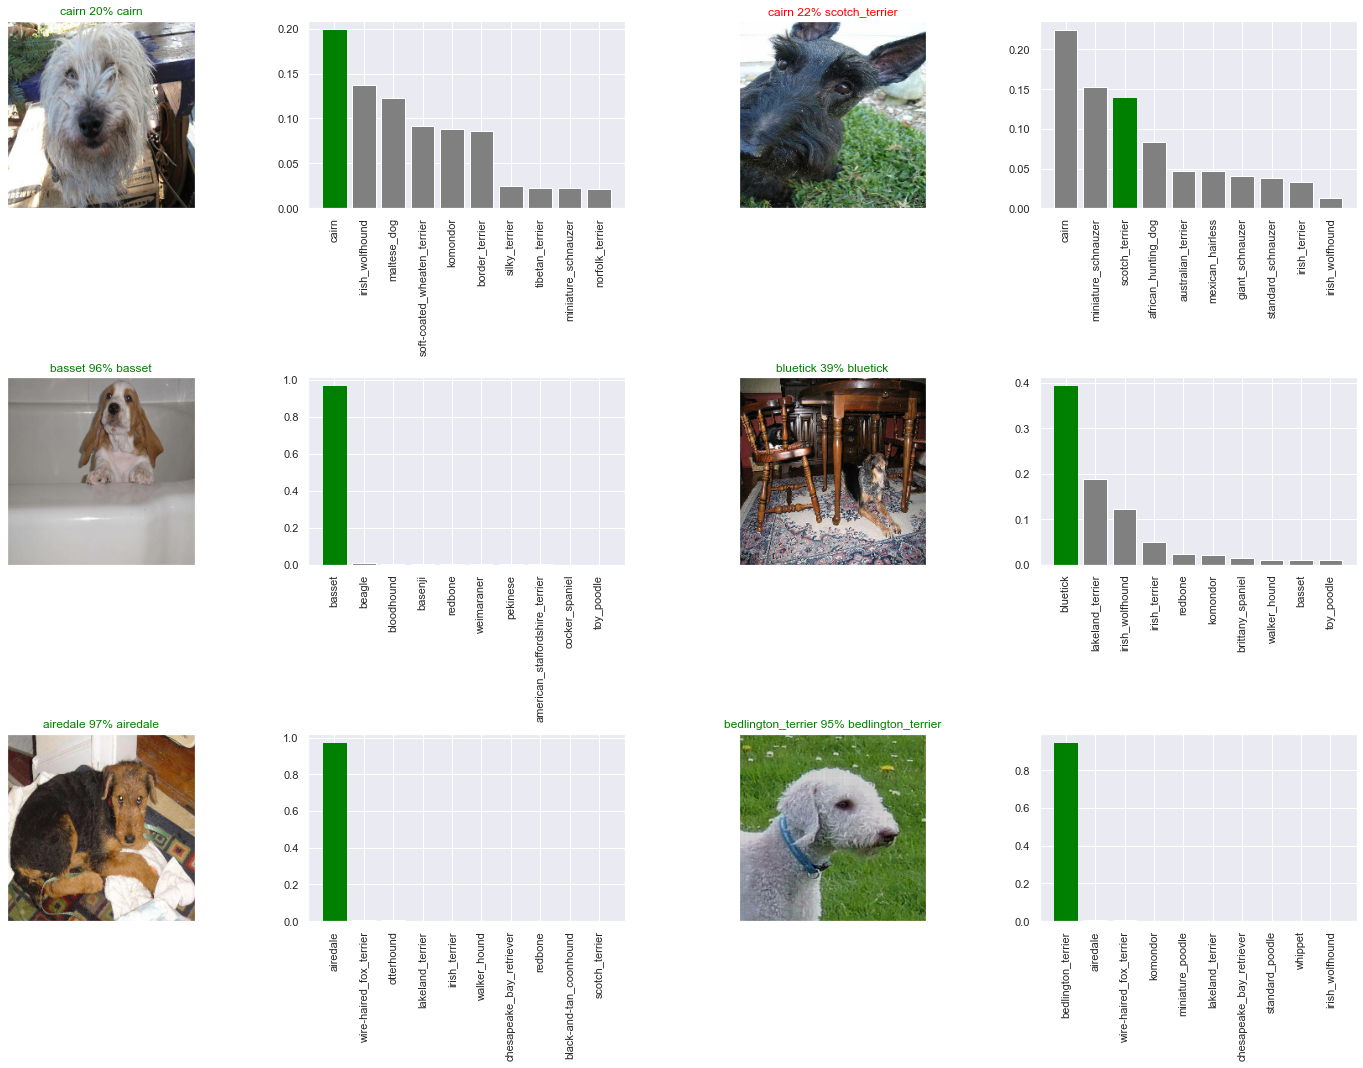

In [97]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images) :
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(prediction_probabilities=predictions,
             labels=val_labels,images=val_images,
             n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
             labels=val_labels,
             n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [98]:
# Challenge  how would you create a confusion matrix with our model predictions and true labels?

In [106]:
# Saving and reloading a trained model
def save_model(model, suffix=None):
    """
    Saves a gives model in a models directory and appends a suffix (string).

    """
    # Create a model directory pathname with current time
    modeldir = os.path.join('C:/Users/home/Documents/Workig/New_Workig/Deep\ learning/logs',
                         # Make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    model_path = modeldir + '-' +suffix + '.h5' #save format model
    print(f'Saving model to : {model_path}...')
    model.save(model_path)
    return model_path

In [107]:
# Create  a function to load a trained model
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f'Loading saved model from: {model_path}')
    model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer':hub.KerasLayer})
    return model

In [108]:
# Now we have got function to save and load a trained model, lets make sure they work

In [109]:
# Save our model trained on 1000 images
save_model(model, suffix='1000-images_mobilenetv2_sushil_1')

Saving model to : C:/Users/home/Documents/Workig/New_Workig/Deep\ learning/logs\20220520-102350-1000-images_mobilenetv2_sushil_1.h5...


'C:/Users/home/Documents/Workig/New_Workig/Deep\\ learning/logs\\20220520-102350-1000-images_mobilenetv2_sushil_1.h5'

In [111]:
# Load a trained model 
loaded_1000_image_model = load_model('C:/Users/home/Documents/Workig/New_Workig/Deep\\ learning/logs\\20220520-102350-1000-images_mobilenetv2_sushil_1.h5')

Loading saved model from: C:/Users/home/Documents/Workig/New_Workig/Deep\ learning/logs\20220520-102350-1000-images_mobilenetv2_sushil_1.h5


In [112]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 13s 2s/step - loss: 1.3834 - accuracy: 0.6200


[1.3834344148635864, 0.6200000047683716]

In [113]:
# Evaluate the loaded the model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 14s 2s/step - loss: 1.3834 - accuracy: 0.6200


[1.3834344148635864, 0.6200000047683716]

In [115]:
# Training a big dog model(on full data)
len(X), len(y)

(10222, 10222)

In [116]:
# Create a data bacth with the full data set
full_data = create_data_batches(X,y)

Creating training data batches.......


In [117]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [118]:
# Create model for full model
full_model = create_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [120]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when traing on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                            patience=3)

In [121]:
# Fit the full model to the full data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 657s 2s/step - loss: 1.3400 - accuracy: 0.6735
Epoch 2/100
320/320 [==============================] - 652s 2s/step - loss: 0.4021 - accuracy: 0.8815
Epoch 3/100
320/320 [==============================] - 641s 2s/step - loss: 0.2389 - accuracy: 0.9330
Epoch 4/100
320/320 [==============================] - 646s 2s/step - loss: 0.1519 - accuracy: 0.9662
Epoch 5/100
320/320 [==============================] - 638s 2s/step - loss: 0.1052 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 633s 2s/step - loss: 0.0775 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 640s 2s/step - loss: 0.0583 - accuracy: 0.9920
Epoch 8/100
320/320 [==============================] - 615s 2s/step - loss: 0.0465 - accuracy: 0.9937
Epoch 9/100
320/320 [==============================] - 611s 2s/step - loss: 0.0378 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 615s 2s/step - loss: 0.031

In [122]:
save_model(full_model,suffix='full-image_set_mobilenetv2-Adam')

Saving model to : C:/Users/home/Documents/Workig/New_Workig/Deep\ learning/logs\20220520-142738-full-image_set_mobilenetv2-Adam.h5...


'C:/Users/home/Documents/Workig/New_Workig/Deep\\ learning/logs\\20220520-142738-full-image_set_mobilenetv2-Adam.h5'

In [123]:
# Load in the full model
loaded_full_model = load_model('C:/Users/home/Documents/Workig/New_Workig/Deep\\ learning/logs\\20220520-142738-full-image_set_mobilenetv2-Adam.h5')

Loading saved model from: C:/Users/home/Documents/Workig/New_Workig/Deep\ learning/logs\20220520-142738-full-image_set_mobilenetv2-Adam.h5


In [124]:
# Making predictions on the test dataset

# Since our model has been trained on images in the form of Tensor batches to make predictions on the test data 
# we will have to get it into the same format.

# Luckily we created create_data_batches() earlier which can take a list of filename as input convert them into
#Tensor batche

# To make predictions on the test data we will:
 # Get the test image filenames
 # Convert the filenames into test data batches using 'create_data_batches()' and setting the 'test_data' parameter to
# 'True' (Since the test data doesn't have labels)
# Make a predictions array by passing the test batches to the 'predict()' method called on our model.

In [127]:
# Load test image filenames
test_path = 'test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'test/002f80396f1e3db687c5932d7978b196.jpg',
 'test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [137]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating text data batches.......


In [138]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [139]:
# Calling predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict (test_data,
                                             verbose=1)

324/324 [==============================] - 659s 2s/step


In [140]:
# save predictions (Numpy array) to csv file (for access later)
# np.savetext('C:/Users/home/Documents/Workig/New_Workig/Deep learning/preds_array.csv',delimeter=",")

In [141]:
# Load predictions (Numpy array) from csv file
#test_predictions = np.loadtxt('C:/Users/home/Documents/Workig/New_Workig/Deep learning/preds_array.csv',delimeter=","')

In [142]:
test_predictions.shape

(10357, 120)

In [143]:
# Preparing test dataset predictions for kaggle

# Looking at the kaggle sample submission, we find that it wants our model prediction probability outputs in a DataFrame 
# with an id and a column for each different dog breed.

# To get the data in this format, we will :
 # Create a pandas DataFrame with an ID column as well as a column for each dog breed.
 # Add data to id column by extracting the test image ID's from their filepaths.
 # Add data (the prediction probabilities) to each of the dog breed columns.
 # Export the DataFrame as a CSV to submit it to kaggle

In [144]:
# id + list(unique_breed)

In [146]:
pred_df = pd.DataFrame(columns=['id'] + list(unique_breed))
pred_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [149]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
pred_df['id'] = test_ids

In [150]:
pred_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
pred_df[list(unique_breed)] = test_predictions

In [152]:
pred_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,2.738799e-12,1.193648e-12,4.473078e-15,1.641351e-14,4.684682e-14,1.220201e-12,2.063528e-17,6.671013e-14,2.658602e-14,...,2.009715e-13,6.069287e-15,1.326380e-14,1.241892e-15,2.855714e-14,2.442861e-13,8.735561e-14,8.000143e-15,8.336943e-11,5.733441e-12
1,00102ee9d8eb90812350685311fe5890,2.360316e-06,4.057019e-07,2.322017e-08,4.881920e-09,4.745272e-07,6.381534e-09,1.206501e-06,3.959110e-07,1.004671e-08,...,1.942058e-08,1.862166e-07,2.804595e-09,1.481561e-06,4.803614e-08,1.688512e-07,6.054826e-05,4.857450e-11,1.543114e-07,3.463198e-10
2,0012a730dfa437f5f3613fb75efcd4ce,6.940296e-11,2.323765e-06,1.066088e-08,6.991915e-11,2.744621e-10,1.251208e-09,8.078126e-11,3.621300e-12,1.186199e-08,...,9.699275e-12,1.508869e-11,1.507443e-07,3.364690e-07,1.345054e-07,3.129350e-07,4.943334e-12,3.285422e-07,9.944909e-11,5.731221e-11
3,001510bc8570bbeee98c8d80c8a95ec1,9.108763e-06,5.986287e-08,1.474844e-06,2.024228e-06,6.734320e-06,4.971956e-07,3.434523e-11,4.195942e-10,1.381341e-07,...,1.009382e-06,2.645070e-11,4.581495e-07,3.884456e-10,3.355059e-07,2.788098e-10,5.638136e-16,6.240506e-03,5.452338e-10,1.367117e-07
4,001a5f3114548acdefa3d4da05474c2e,4.622013e-05,7.326671e-06,8.616349e-09,2.981043e-10,5.094928e-10,4.020980e-12,2.279597e-10,2.378083e-09,1.420926e-09,...,4.662266e-08,3.615622e-11,6.621440e-11,7.192192e-12,1.072139e-09,5.155409e-10,2.661044e-11,4.578711e-09,2.889375e-10,6.112334e-08


In [153]:
# Saving our predictions dataframe to CSV for submission to Kaggle
pred_df.to_csv('full_model_predictions_submission_1_mobilenetv2.csv',
              index=False)

In [154]:
# Making predictions on custom images

 # To make predictions on custom of our own images we will:
    # Get the filepaths of our own images.
    # Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels,
    # we set the test_data parameters to True.
    # pass the custom image data batch to our models predict() method.
    # Convert the prediction output probabilities to predictions labels.
    # Compare the predicted lables to the custom images.

In [155]:
# Get custom image filepaths
custom_path = 'C:/Users/home/Pictures/dog_mages/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [157]:
custom_image_paths

['C:/Users/home/Pictures/dog_mages/dog-golden-retriever-jumping-autumn-leaves-autumnal-sunlight-77861618.jpg',
 'C:/Users/home/Pictures/dog_mages/download.jpeg',
 'C:/Users/home/Pictures/dog_mages/golden-retriever-royalty-free-image-506756303-1560962726.jpg']

In [158]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths,test_data=True)
custom_data

Creating text data batches.......


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [159]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [160]:
custom_preds.shape

(3, 120)

In [163]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range (len(custom_preds))]

In [164]:
custom_pred_labels

['golden_retriever', 'golden_retriever', 'golden_retriever']

In [166]:
# Get custom images (our unbatchify() function won't work since there are not labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

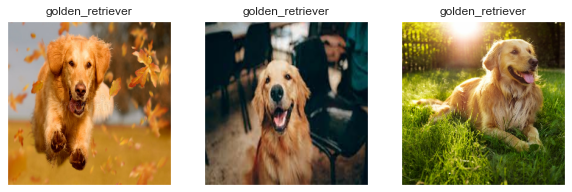

In [172]:
# Check custom data predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)

In [ ]:
# Workflow --> 1.Get data ready(turn into tensors)
             # 2.Pick a model(to suit you problem)
             # 3.fit the model to the data and make prediction
             # 4.Evaluate model
             # 5.Improve through experimentation
             # 6.Save and Reload your trained model
        